In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/Users/amanpreetsingh/Desktop/VSCode/Market/extracted_data/NY-House-Dataset.csv')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [7]:
df.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [4]:
numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(numeric_features)

['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'LATITUDE', 'LONGITUDE']


In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['LATITUDE'], c='red', alpha=0.6, edgecolors='black')

TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 800x600 with 0 Axes>

In [ ]:
PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',

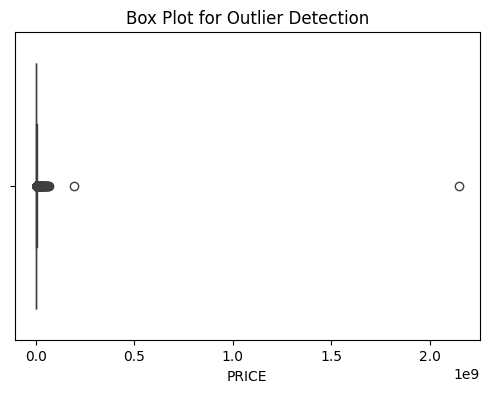

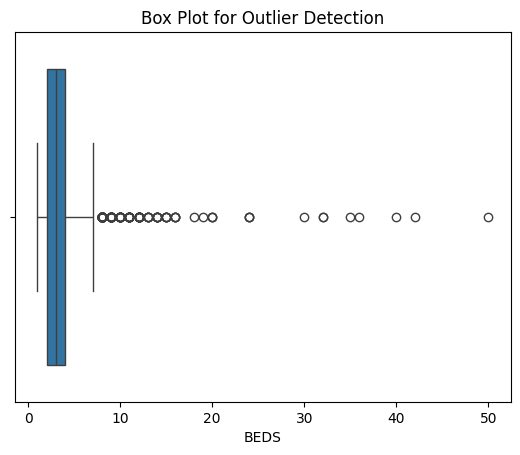

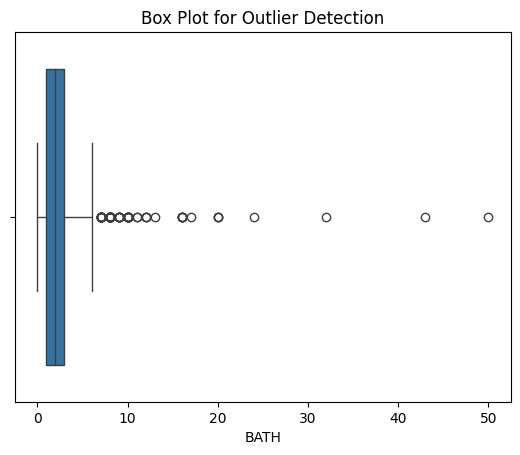

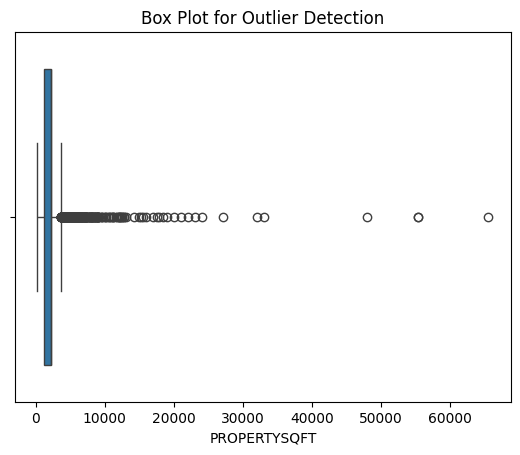

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['PRICE'])
plt.title("Box Plot for Outlier Detection")
plt.show()
sns.boxplot(x=df['BEDS'])
plt.title("Box Plot for Outlier Detection")
plt.show()
sns.boxplot(x=df['BATH'])
plt.title("Box Plot for Outlier Detection")
plt.show()
sns.boxplot(x=df['PROPERTYSQFT'])
plt.title("Box Plot for Outlier Detection")
plt.show()

In [ ]:
#check outlier 

import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
import pandas as pd
df = pd.read_csv('/Users/amanpreetsingh/Desktop/VSCode/Market/extracted_data/NY-House-Dataset.csv')

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['values'])
plt.title("Box Plot for Outlier Detection")
plt.show()